In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def signal_samples(t):
    return (2*np.sin(2*np.pi*t)+3*np.sin(22*2*np.pi*t)+2*np.random.randn(*np.shape(t)))

In [3]:
B = 30.0
f_s = 2*B
delta_f = 0.01
N = int(f_s/delta_f)
T = N/f_s

In [4]:
t = np.linspace(0, T, N)
f_t = signal_samples(t)

In [5]:
f = fftfreq(N, 1./f_s)
mask = np.where(f>=0)

In [7]:
F = fftpack.fft(f_t)

In [8]:
F_filtered = F * (abs(f)<2)
f_t_filtered = fftpack.ifft(F_filtered)

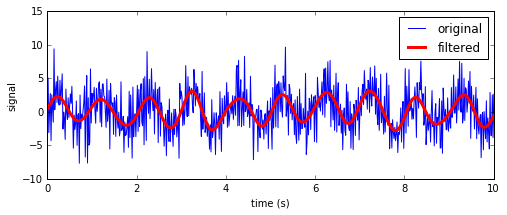

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, f_t, label="original")
ax.plot(t, f_t_filtered.real, color='red', lw=3, label="filtered")
ax.set_xlim(0, 10)
ax.set_xlabel("time (s)")
ax.set_ylabel("signal")
ax.legend()

In [10]:
H = abs(f) < 2.
h = fftshift(ifft(H))

In [11]:
from scipy import signal

In [12]:
f_t_filtered_conv = signal.convolve(f_t, h, mode='same')

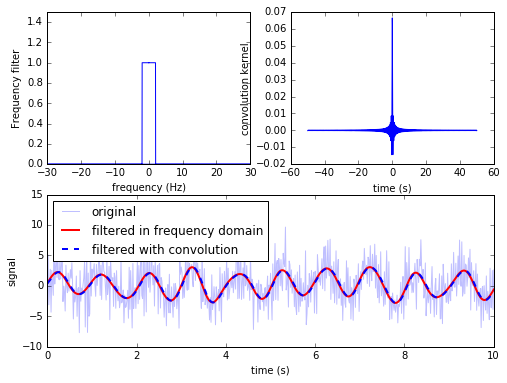

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot2grid((2,2),(0,0))
ax.plot(f, H)
ax.set_xlabel("frequency (Hz)")
ax.set_ylabel("Frequency filter")
ax.set_ylim(0, 1.5)
ax = plt.subplot2grid((2,2),(0,1))
ax.plot(t-t[-1]/2.0, h.real)
ax.set_xlabel("time (s)")
ax.set_ylabel("convolution kernel")
ax = plt.subplot2grid((2,2),(1,0),colspan=2)
ax.plot(t, f_t, label='original', alpha=0.25)
ax.plot(t, f_t_filtered.real, 'r', lw=2, label='filtered in frequency domain')
ax.plot(t, f_t_filtered_conv.real, 'b--', lw=2, label='filtered with convolution')
ax.set_xlim(0, 10)
ax.set_xlabel("time (s)")
ax.set_ylabel("signal")
ax.legend(loc=2)